# Black Friday Dataset EDA and Model Building

### Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [204]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [205]:
# Dataset Reading

df_train = pd.read_csv('D:\\EDA\\Black Friday Sales Analysis and Prediction\\Datasets\\Black Friday Datasets\\train.csv')
df_test = pd.read_csv('D:\\EDA\\Black Friday Sales Analysis and Prediction\\Datasets\\Black Friday Datasets\\test.csv')

In [281]:
df_train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [207]:
df_test

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


In [208]:
# Merge the dataset to get full dataset
df = pd.concat([df_train,df_test])
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [209]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [211]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


- we dont need user id maximum the users are unique.
- so drop the user id.

In [212]:
df.drop(['User_ID'],axis=1,inplace=True)

In [213]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


# Feature Engineering

### Focusing on Missing Values

In [214]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

- We need to focus on Product_Category_2,Product_Category_3 and Purchase.         

In [215]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [216]:
df['Product_Category_2'].mode()

0    8.0
Name: Product_Category_2, dtype: float64

In [217]:
df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0],inplace=True)

In [218]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [219]:
df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0],inplace=True)

In [220]:
df['Purchase'].unique() # These has many values so only mean is suitable for this

array([ 8370., 15200.,  1422., ...,   123.,   613.,    nan])

In [221]:
df['Purchase'].fillna(df['Purchase'].mean(),inplace=True)

In [222]:
df.isnull().sum()

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

### Focusing on categorical variables

### Encoding the Gender 

In [223]:
df['Gender'] = pd.get_dummies(df['Gender'],drop_first = True)

In [224]:
df['Gender'] = df['Gender'].astype(int)

In [225]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,8.0,16.0,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,8.0,16.0,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,16.0,1057.0
4,P00285442,1,55+,16,C,4+,0,8,8.0,16.0,7969.0


Gender feature has only two categories so use manual encoding this is another method

In [226]:
# df['Gender'] = df['Gender'].map({'F':0,'M':1})
# This also applicable

### Encoding the Age 

###### Perform label encoding on age

In [227]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [228]:
# df['Age'] = df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [229]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,8.0,16.0,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,8.0,16.0,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,16.0,1057.0
4,P00285442,1,55+,16,C,4+,0,8,8.0,16.0,7969.0


###### Another method to perform Label Encoding using sklearn

In [230]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['Age'] = label_encoder.fit_transform(df['Age'])
df['Age']

0         0
1         0
2         0
3         0
4         6
         ..
233594    2
233595    2
233596    2
233597    4
233598    4
Name: Age, Length: 783667, dtype: int32

In [231]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,A,2,0,3,8.0,16.0,8370.0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0,10,A,2,0,12,8.0,16.0,1422.0
3,P00085442,0,0,10,A,2,0,12,14.0,16.0,1057.0
4,P00285442,1,6,16,C,4+,0,8,8.0,16.0,7969.0


### Encoding the City Category 

In [232]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [233]:
# Perform One hot Encoding
pd.get_dummies(df['City_Category'],drop_first = True).astype(int)

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
233594,1,0
233595,1,0
233596,1,0
233597,0,1


In [234]:
df_city = pd.get_dummies(df['City_Category'],drop_first = True).astype(int)

In [235]:
# Concat df_city to df
df = pd.concat([df,df_city],axis = 1)

In [236]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,A,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,0,10,A,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,0,10,A,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,6,16,C,4+,0,8,8.0,16.0,7969.0,0,1


In [237]:
# We are encoded the city category 
# So city category is not needed
df.drop('City_Category',axis=1,inplace=True)

In [238]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,0,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,0,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,6,16,4+,0,8,8.0,16.0,7969.0,0,1


### Encoding the Stay in Current City Years



In [239]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

- All are numerical values the only problem is the value 4+ so just change to 4
- No need to encoding just replace

In [240]:
# Just Replacing
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')

In [241]:
df['Stay_In_Current_City_Years']

0         2
1         2
2         2
3         2
4         4
         ..
233594    4
233595    4
233596    4
233597    4
233598    4
Name: Stay_In_Current_City_Years, Length: 783667, dtype: object

In [242]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,0,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,0,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,6,16,4,0,8,8.0,16.0,7969.0,0,1


In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int32  
 2   Age                         783667 non-null  int32  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    783667 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(4), int64(3), object(2)
memory usage: 65.8+ MB


 4   Stay_In_Current_City_Years  783667 non-null  object ---> change to int

In [244]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int32  
 2   Age                         783667 non-null  int32  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    783667 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(5), int64(3), object(1)
memory usage: 62.8+ MB


In [246]:
df['Marital_Status'].value_counts()

Marital_Status
0    462538
1    321129
Name: count, dtype: int64

# Observation Questions

- Which product category have the highest purchase ?
- How Category A is differs form B and C ?
- Comparison between some important features

###### This project is only focuses on the Model building.So we have working with limited analysis for this project.

##### Which product category have the highest purchase ?

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int32  
 2   Age                         783667 non-null  int32  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    783667 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(5), int64(3), object(1)
memory usage: 62.8+ MB


In [248]:
 df.groupby(['Product_Category_1'])['Purchase'].sum()

Product_Category_1
1     2.468826e+09
2     3.629346e+08
3     2.835510e+08
4     7.372812e+07
5     1.544151e+09
6     4.062291e+08
7     7.594142e+07
8     1.302408e+09
9     8.167534e+06
10    1.216627e+08
11    2.078482e+08
12    2.073782e+07
13    2.606611e+07
14    2.615671e+07
15    1.179262e+08
16    1.831492e+08
17    7.944564e+06
18    2.143526e+07
19    5.937800e+04
20    9.447270e+05
Name: Purchase, dtype: float64

In [249]:
Product_Category_1_total = df.groupby(['Product_Category_1'])['Purchase'].sum().sum()
Product_Category_1_total

7259866569.37854

##### To find the high purchase category

In [250]:
product_categories = ['Product_Category_1', 'Product_Category_2', 'Product_Category_3']

total_purchase = []  # For Visualization Value purpose
max_total_purchase = 0
max_category = None

for category in product_categories:
    category_sum = df.groupby(category)['Purchase'].sum().sum()
    total_purchase.append(category_sum) # For Visualization Value purpose
    max_category_index = total_purchase.index(max(total_purchase)) # For Visualization Value purpose
    print(f"Total purchase amount for {category}: {category_sum}")
    
    if category_sum > max_total_purchase:
        max_total_purchase = category_sum
        max_category = category

if max_category is not None:
    print(f"The product category with the highest total purchase is {max_category} with a total purchase amount of {max_total_purchase}")
else:
    print("No category data found.")


Total purchase amount for Product_Category_1: 7259866569.37854
Total purchase amount for Product_Category_2: 7259866569.378538
Total purchase amount for Product_Category_3: 7259866569.378538
The product category with the highest total purchase is Product_Category_1 with a total purchase amount of 7259866569.37854


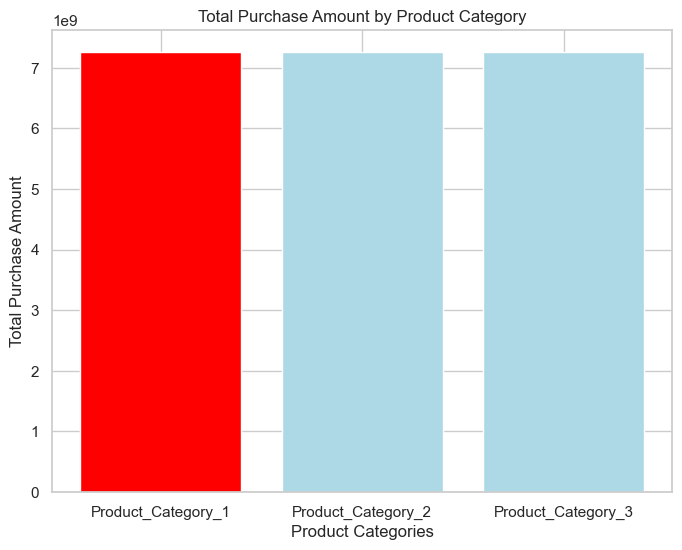

In [251]:
# Some Visualization

plt.figure(figsize=(8, 6))
plt.bar(product_categories, total_purchase, color='lightblue')
plt.bar(product_categories[max_category_index], total_purchase[max_category_index], color='red')

plt.xlabel('Product Categories')
plt.ylabel('Total Purchase Amount')
plt.title('Total Purchase Amount by Product Category')
plt.xticks(rotation=0)  # Display category names without rotation
plt.show()


- Product_Category_1 have the highest purchase it indicates the red in color in graph

###### How Category A is differs form B and C ?

In [252]:
# Create dataframe for particularly this 
columns = ['B','C']

df_catagory = pd.DataFrame(df[columns])

# To find out A

df_catagory['A'] = 0  # Initialize the 'A' column with zeros
df_catagory.loc[(df['B'] == 0) & (df['C'] == 0), 'A'] = 1  # Set 'A' to 1 where both 'B' and 'C' are zero

In [253]:
df_catagory # Now We are get three categories 

,B,C,A
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,1,0
...,...,...,...
233594,1,0,0
233595,1,0,0
233596,1,0,0
233597,0,1,0


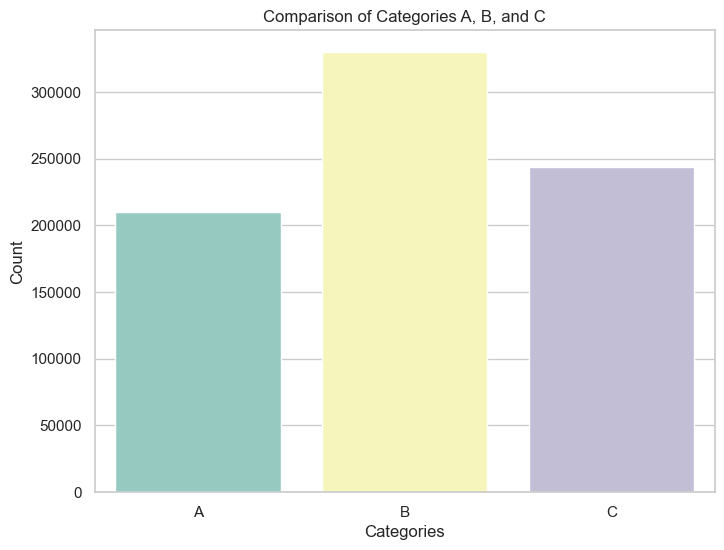

In [254]:
# Visualization
# Assuming you have a DataFrame 'df_catagory' with columns 'A', 'B', and 'C'
sns.set(style="whitegrid")

# Create a bar plot to compare the distribution of categories A, B, and C
category_counts = df_catagory[['A', 'B', 'C']].sum()
category_names = ['A', 'B', 'C']

plt.figure(figsize=(8, 6))
sns.barplot(x=category_names, y=category_counts, palette="Set3")

plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Comparison of Categories A, B, and C')
plt.show()


In [255]:
category_counts

A    210244
B    329739
C    243684
dtype: int64

It Shows that the category B has the highest count compare than other two categories.The category A is small count compare than B and C categories.

###### Comparison between some important features

<Axes: xlabel='Age', ylabel='Purchase'>

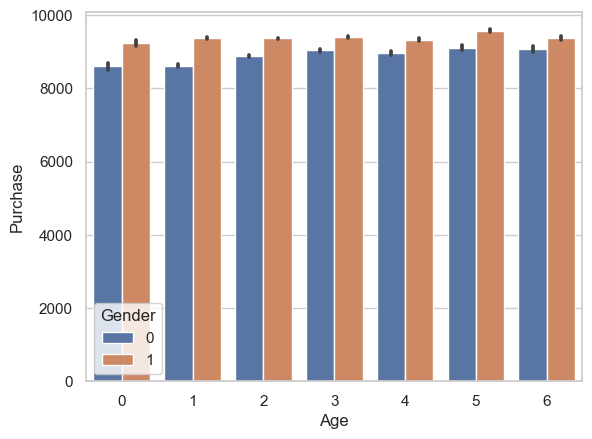

In [256]:
##Visualisation Age vs Purchased
sns.barplot(x = 'Age',y = 'Purchase',hue='Gender',data=df)

### Observation

- The purchasing of Men is higher than woman
- In all Age Category, Only the Men is higher purchase.

<Axes: xlabel='Occupation', ylabel='Purchase'>

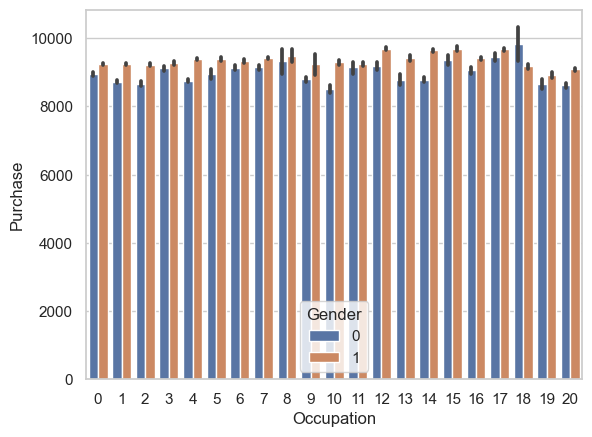

In [257]:
##Visualisation Age vs Purchased
sns.barplot(x = 'Occupation',y = 'Purchase',hue='Gender',data=df)

### Observation

- The 18th Occupation males are purchases more than 10000.

The Occupation means Jobs or any other position

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

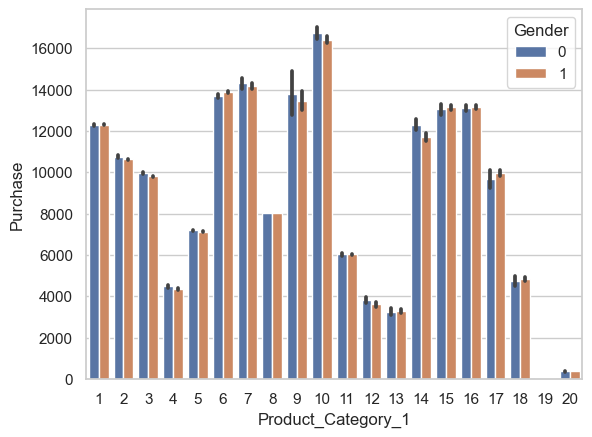

In [258]:
sns.barplot(x = 'Product_Category_1',y = 'Purchase',hue='Gender',data=df)

### Observation

- The Product Category one,The 10th Product is purchased at very high it crosses over 16000

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

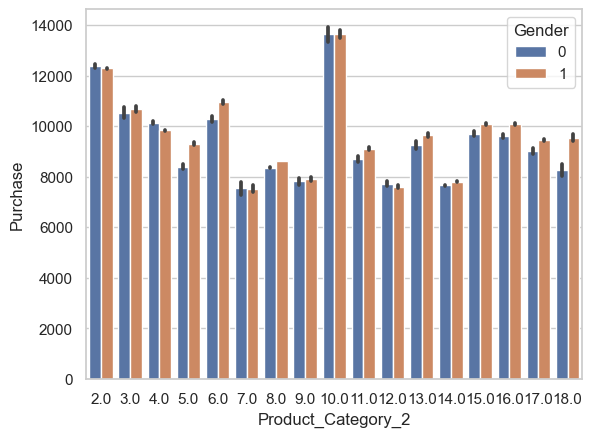

In [259]:
sns.barplot(x = 'Product_Category_2',y = 'Purchase',hue='Gender',data=df)

### Observation
- The Product Category two,The 10th Product Purchased over 14000 and then 2nd Product Purchased over 12000.

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

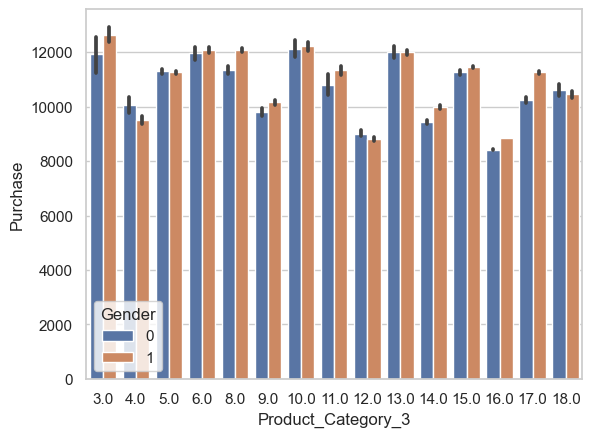

In [260]:
sns.barplot(x = 'Product_Category_3',y = 'Purchase',hue='Gender',data=df)

### Observation
- The Product Category three,Almost of the product are purchased between the range of 10000 to 12000

<Axes: xlabel='Age', ylabel='Purchase'>

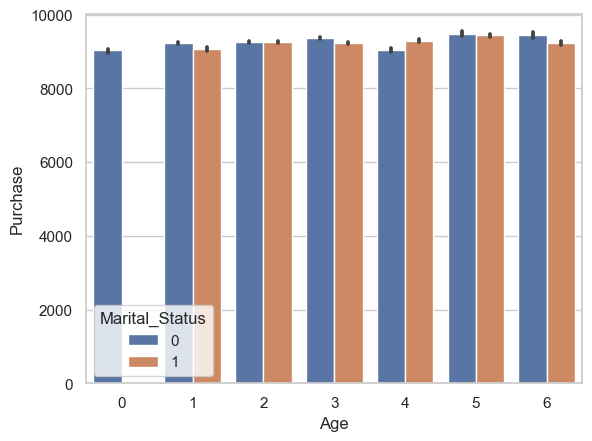

In [261]:
sns.barplot(x ='Age',y='Purchase',hue='Marital_Status',data=df)

### Observation  0-Married ,1-Non Married

- The non-married of 0th Catagory of age (Ranges 0-17) age peoples are not purchased anything in Black Friday Sales.
- Other Age catagory peoples are mostly purchased between the age of 8000 to 10000.

##### This is some analysis about Black friday sales dataset

# Feature Selection For Model Building

In [262]:
df.drop('Product_ID',axis = 1,inplace=True)

<Axes: >

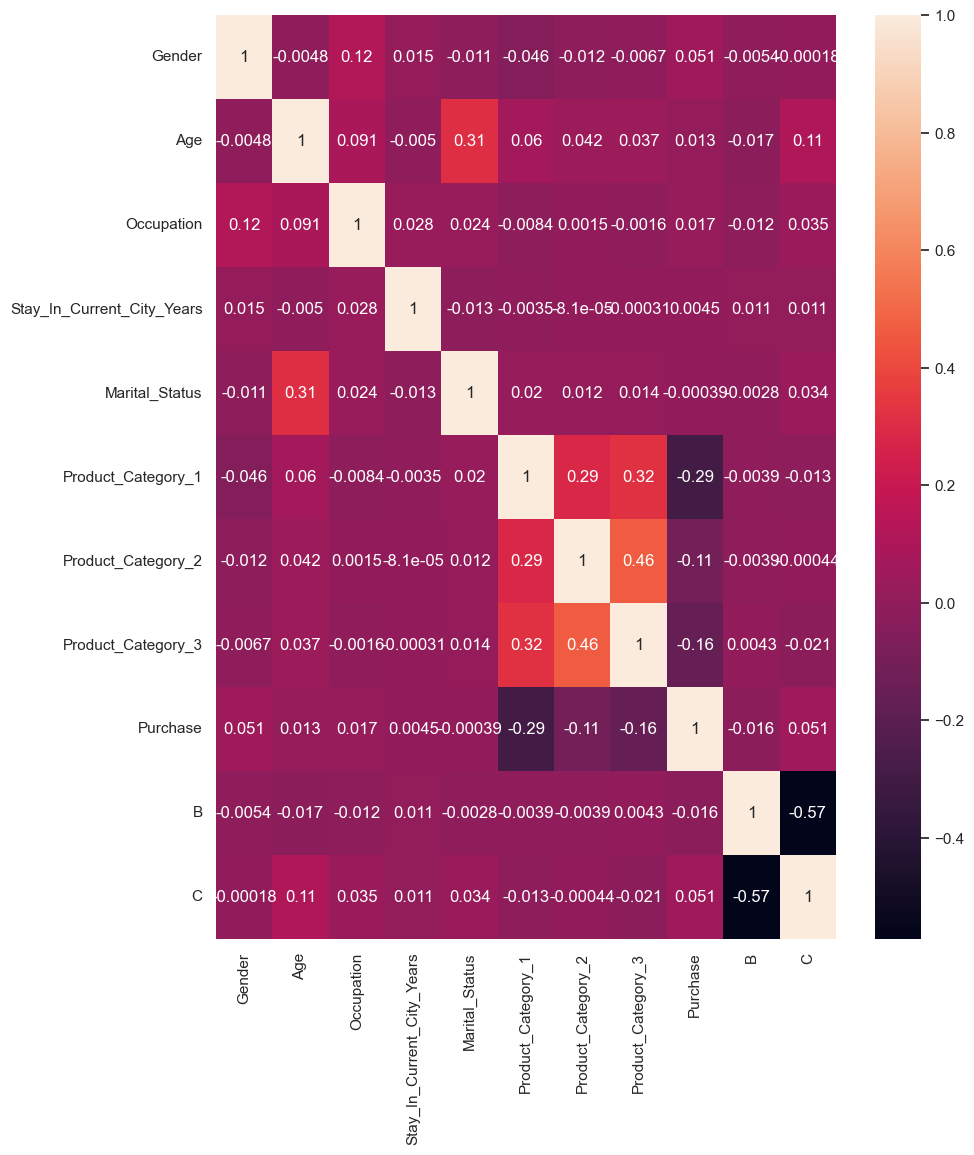

In [263]:
plt.figure(figsize=(10,12))
sns.heatmap(df.corr(),annot =True)

- All the features are no more maximum co-related 
- So select the all feature for model building

# Feature Scaling

In [267]:
X = df.drop('Purchase',axis = 1) # Independent Variable

In [268]:
y = df['Purchase'] # Dependent Variable

In [269]:
X.shape

(783667, 10)

In [270]:
y.shape

(783667,)

In [274]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [275]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [276]:
X_train

array([[-1.74429404, -1.84440007,  0.29446358, ...,  0.36810619,
        -0.8518697 , -0.67184308],
       [ 0.57329784, -0.36702294,  1.52110013, ..., -0.36319515,
        -0.8518697 , -0.67184308],
       [ 0.57329784, -0.36702294, -1.08550253, ...,  0.36810619,
        -0.8518697 ,  1.4884428 ],
       ...,
       [-1.74429404, -1.1057115 , -0.62551383, ...,  0.36810619,
         1.17388845, -0.67184308],
       [ 0.57329784, -1.1057115 , -1.2388321 , ...,  0.36810619,
        -0.8518697 , -0.67184308],
       [-1.74429404, -1.1057115 , -0.93217296, ...,  0.36810619,
        -0.8518697 , -0.67184308]])

In [277]:
X_test

array([[ 0.57199958, -0.36773403,  0.90776468, ...,  0.37058089,
         1.1721004 , -0.67163502],
       [ 0.57199958, -0.36773403, -1.2385473 , ...,  0.37058089,
        -0.85316924,  1.48890389],
       [ 0.57199958,  0.37263815,  1.36768867, ...,  0.37058089,
        -0.85316924, -0.67163502],
       ...,
       [ 0.57199958,  0.37263815, -1.2385473 , ...,  0.37058089,
        -0.85316924,  1.48890389],
       [ 0.57199958, -0.36773403,  1.82761267, ...,  0.37058089,
        -0.85316924, -0.67163502],
       [ 0.57199958,  0.37263815, -0.16539131, ...,  0.37058089,
        -0.85316924,  1.48890389]])

# Now its ready for Model Building

- Build your own model also,but you need to perform hyperparameter tuning.

### Performing Random Forest Regressor Algorithm

In [278]:
# Import the necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the results
print("Random Forest Regression Results:")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"R-squared (R2) Score: {r2_rf}")


Random Forest Regression Results:
Mean Squared Error (MSE): 10569215.16727179
R-squared (R2) Score: 0.4021456706372806


### Performing Linear Regression Algorithm

In [279]:
# Import the necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a Linear Regression model
lr_model = LinearRegression()

# Fit the model to the training data
lr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lr = lr_model.predict(X_test)

# Evaluate the Linear Regression model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Print the results
print("Linear Regression Results:")
print(f"Mean Squared Error (MSE): {mse_lr}")
print(f"R-squared (R2) Score: {r2_lr}")


Linear Regression Results:
Mean Squared Error (MSE): 16020479.48441752
R-squared (R2) Score: 0.09379146259750437


### Performing Gradient Boosting Algorithm

In [280]:
# Import the necessary libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
gb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gb = gb_model.predict(X_test)

# Evaluate the Gradient Boosting model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Print the results
print("Gradient Boosting Regression Results:")
print(f"Mean Squared Error (MSE): {mse_gb}")
print(f"R-squared (R2) Score: {r2_gb}")


Gradient Boosting Regression Results:
Mean Squared Error (MSE): 9581423.798654364
R-squared (R2) Score: 0.4580207130967948


Using the following three algorithm each algorithms predicts the different result

- The more MSE explains the more varience between the data points.
- Note: We does not use any hyperparameter tuning,Use hyperparameter tuning to increase the high prediction score and   accuracy.

This is not complete ML project.It mainly covers the Analysis,EDA with some predictive ways.

None of the models are effective in this,So we will see different types of algorithms and hyperparameter tuning in ML courses.Stay in our whatsapp group.

Prepared By Ahamed Basith